# Data exploration:

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/drive/MyDrive/Dataset/Supply_Chain_Dataset_New.csv', encoding='latin1', engine='python')

Mounted at /content/drive


In [3]:
#drop unwanted columns
unwanted_columns =["Category Id","Customer Email","Customer Zipcode","Customer Street","Customer Fname","Customer Id","Customer Lname","Customer Segment","Latitude","Longitude","Order Customer Id","order date (DateOrders)","Order Id","Order Item Cardprod Id","Order Item Id","Order Zipcode","Product Card Id","Product Category Id","Product Status","shipping date (DateOrders)"]
data.drop(unwanted_columns, axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Name                  180519 non-null  object 
 8   Customer City                  180519 non-null  object 
 9   Customer Country               180519 non-null  object 
 10  Customer State                 180519 non-null  object 
 11  Market                         180519 non-null  object 
 12  Order City                    

# Preprocessing:-

In [4]:
# change object data into int or float

hist_data = data.copy(deep=False)

from sklearn.preprocessing import LabelEncoder
def Change_obj_type(data):
    for column in data.columns:
        if data[column].dtype == type(object):
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])
    return data
new_data = Change_obj_type(hist_data)
new_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode
0,2,5,4,-44.630001,284.250000,1,1,0,66,1,...,1,293.040008,284.250000,-44.630001,7,174,6,79,293.040008,3
1,2,2,4,87.180000,249.080002,0,0,0,66,1,...,1,293.040008,249.080002,87.180000,13,283,6,79,293.040008,3
2,1,3,2,105.489998,293.040008,1,1,0,66,1,...,1,293.040008,293.040008,105.489998,7,440,2,79,293.040008,2
3,1,2,2,25.270000,287.179993,3,0,0,66,1,...,1,293.040008,287.179993,25.270000,7,1002,2,79,293.040008,2
4,1,4,2,21.400000,243.220001,1,1,0,66,1,...,1,293.040008,243.220001,21.400000,15,114,2,79,293.040008,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,1,2,1,79.480003,218.949997,1,1,48,66,1,...,1,260.649994,218.949997,79.480003,15,478,3,107,260.649994,0
180515,1,2,1,16.030001,213.729996,1,1,48,66,1,...,1,260.649994,213.729996,16.030001,7,354,3,107,260.649994,0
180516,2,5,2,-28.860001,255.440002,1,1,48,66,1,...,1,260.649994,255.440002,-28.860001,15,932,4,107,260.649994,2
180517,2,5,2,-31.650000,229.369995,1,1,48,66,1,...,1,260.649994,229.369995,-31.650000,11,90,6,107,260.649994,2


/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Indices of outliers: [    20     25     46 ... 180443 180452 180469]
Mahalanobis Distances of outliers: [468.93695121 726.51497787 355.49339021 ... 398.92661892 357.02045298
 267.69138237]


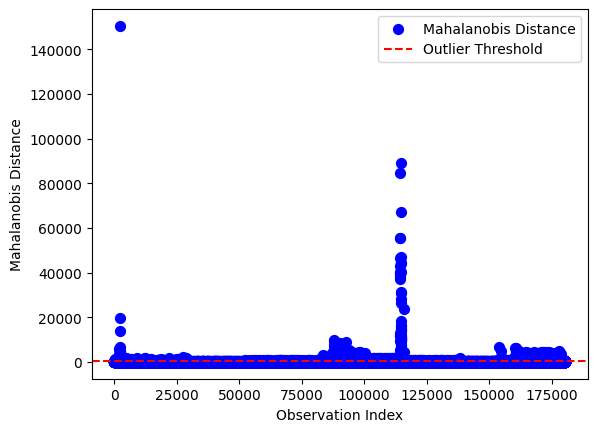

In [7]:
from sklearn.covariance import MinCovDet

# Exclude non-numeric columns from the analysis
numeric_columns = data.select_dtypes(include=[np.number]).columns
X = data[numeric_columns].values

# Fit Minimum Covariance Determinant (MCD) to detect outliers
mcd = MinCovDet()
mcd.fit(X)

# Calculate Mahalanobis Distance for each observation
mahalanobis_distances = mcd.mahalanobis(X)

# Set a threshold for outlier detection (you may need to adjust this)
threshold = np.percentile(mahalanobis_distances, 95)

# Identify outliers based on the threshold
outliers = np.where(mahalanobis_distances > threshold)[0]

# Print or visualize the outliers
print("Indices of outliers:", outliers)
print("Mahalanobis Distances of outliers:", mahalanobis_distances[outliers])

# Visualize the Mahalanobis Distances
import matplotlib.pyplot as plt

plt.scatter(range(len(mahalanobis_distances)), mahalanobis_distances, marker='o', s=50, color='blue', label='Mahalanobis Distance')
plt.axhline(y=threshold, color='red', linestyle='--', label='Outlier Threshold')
plt.xlabel('Observation Index')
plt.ylabel('Mahalanobis Distance')
plt.legend()
plt.show()


# Correlation analysis:-

Text(0.5, 168.5815972222222, 'xlabel')

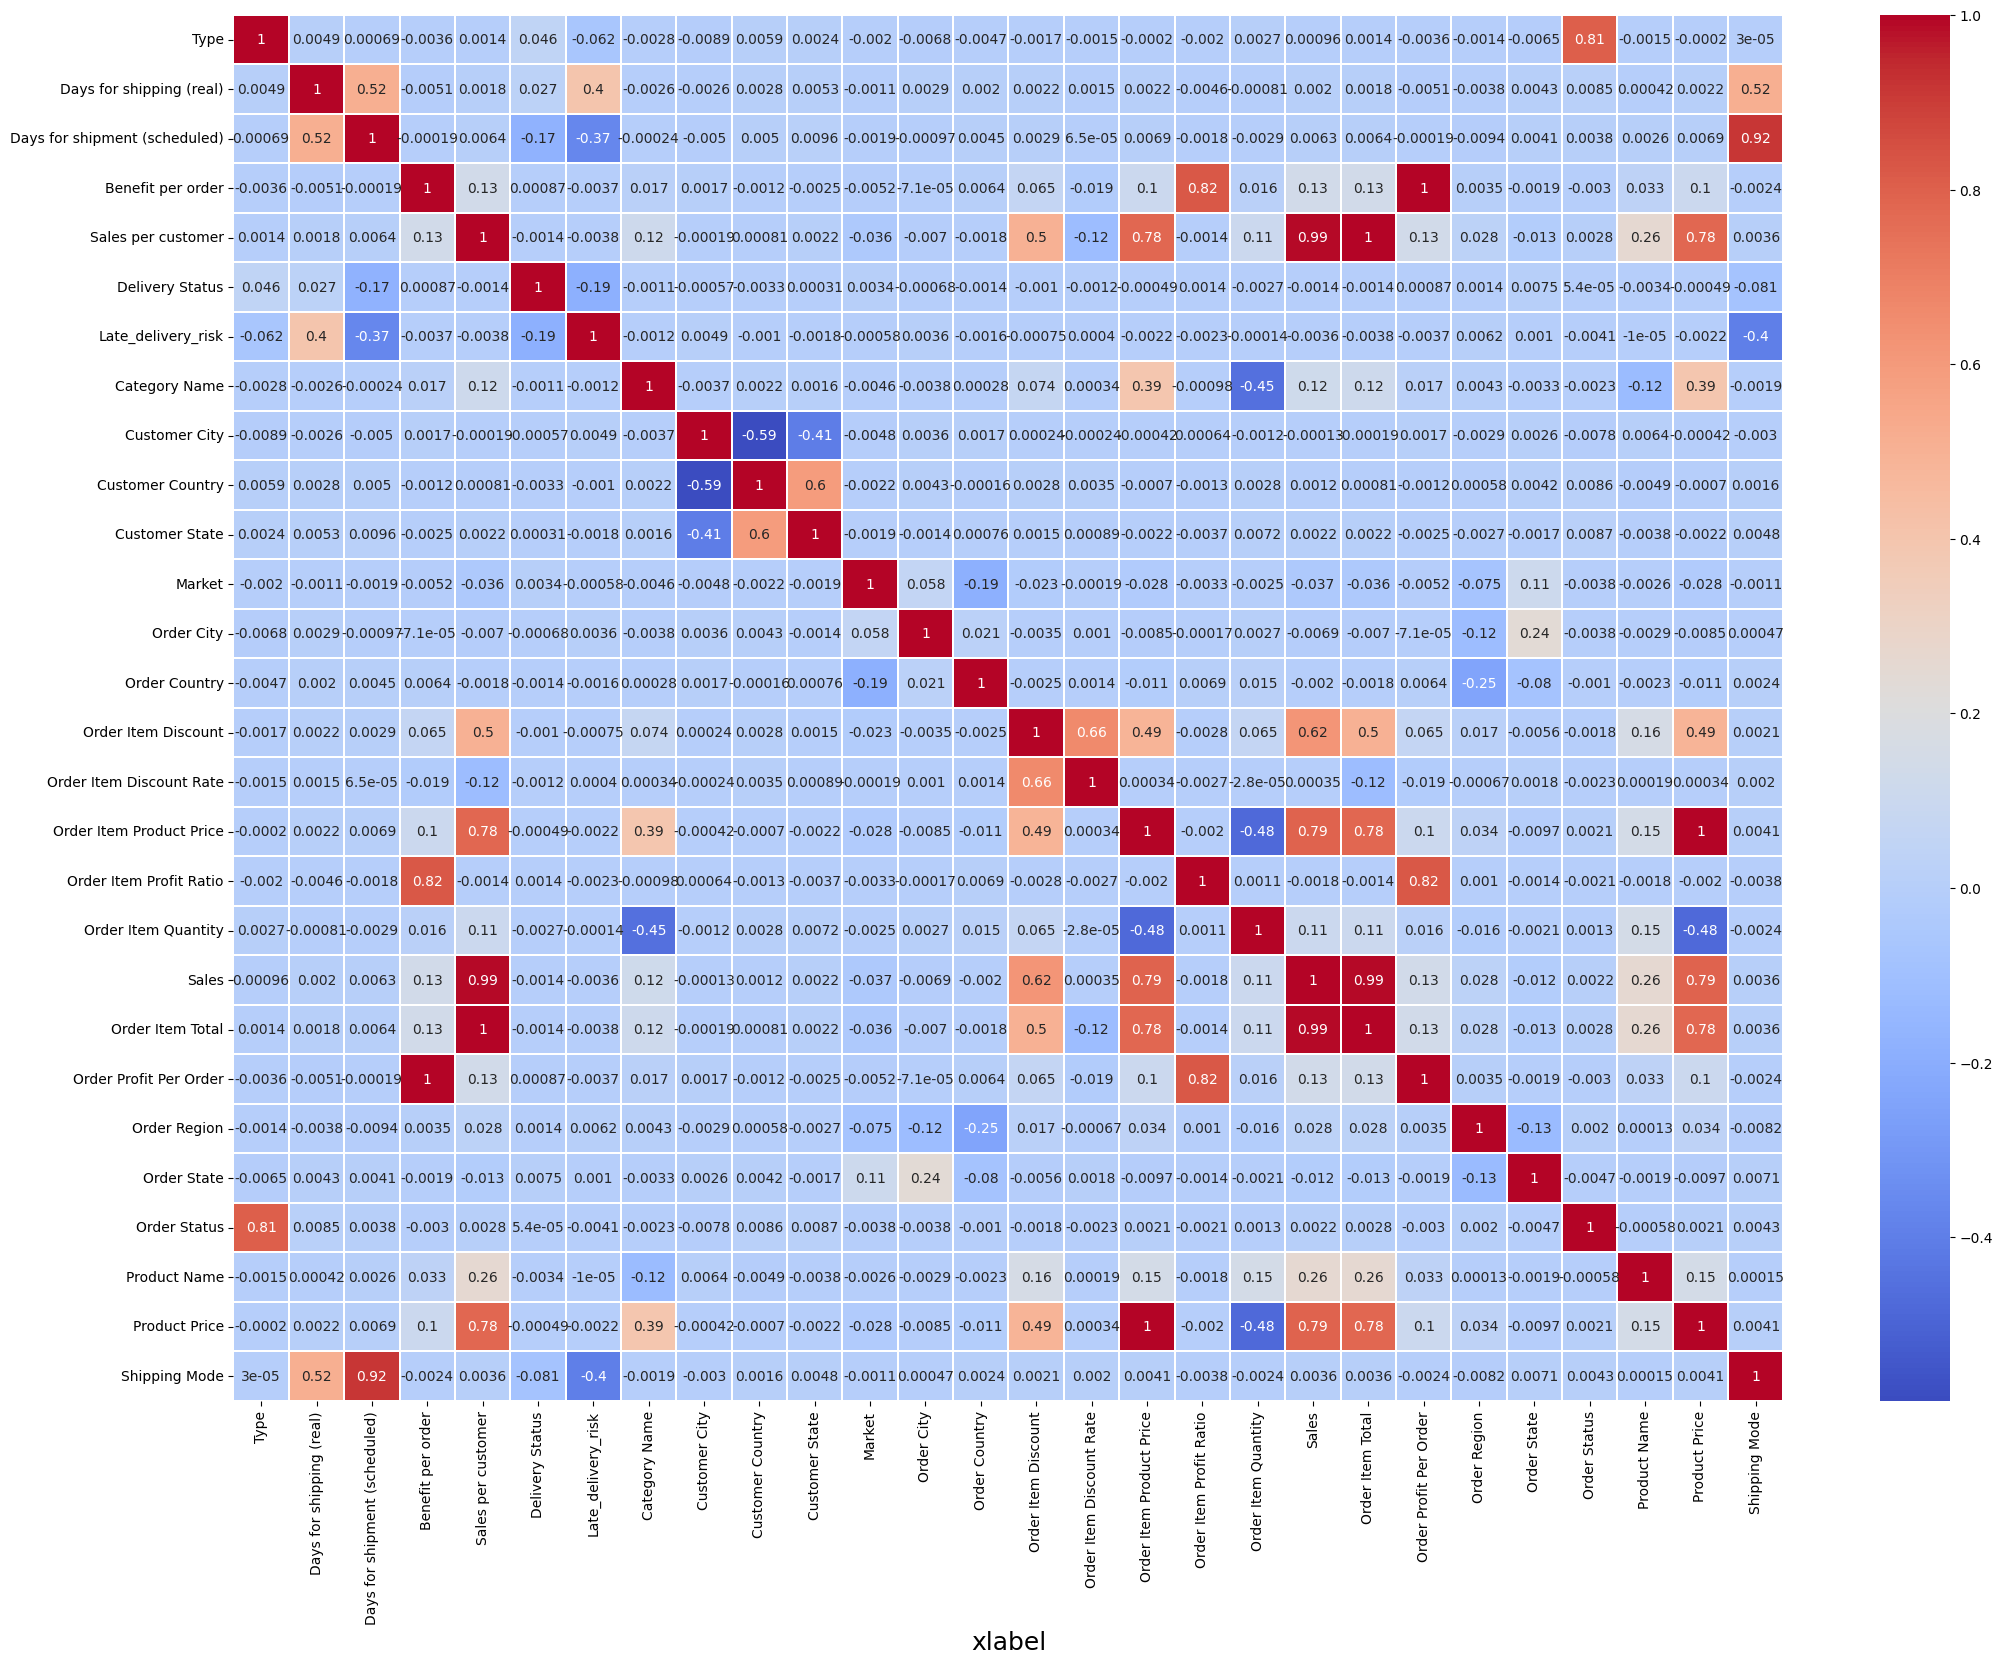

In [ ]:
corr_m = new_data.corr()
f, ax = plt.subplots(figsize=(25,18))
plot = sns.heatmap(corr_m, ax = ax,annot = True, cmap ="coolwarm", linewidths = 0.1)
plt.xlabel('xlabel', fontsize=18)

# Visualizations:-

**1)y:Order Item tot
x:others**

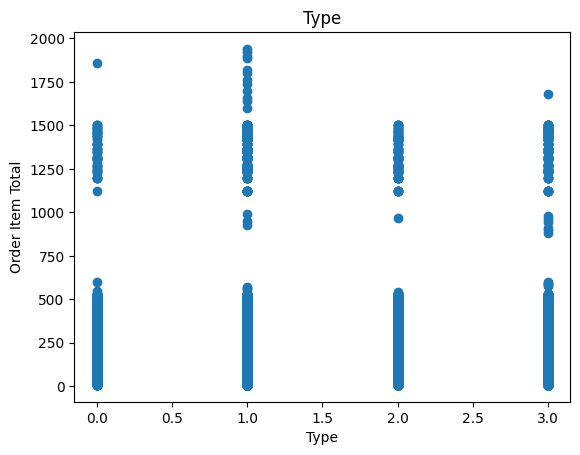

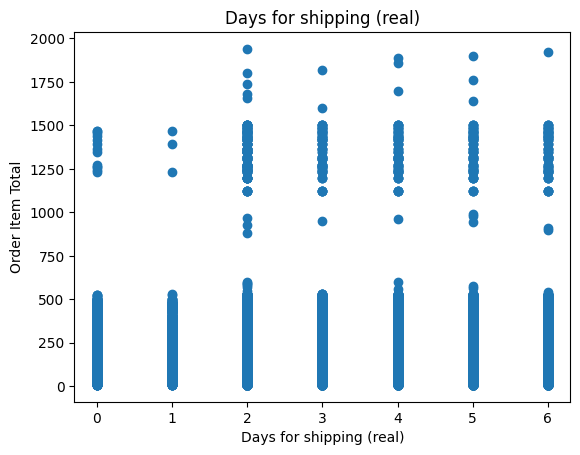

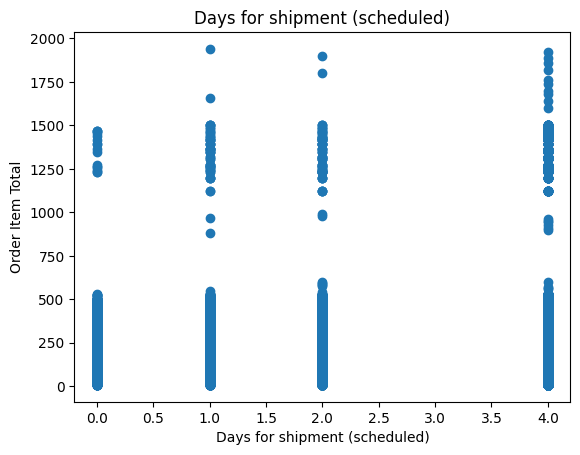

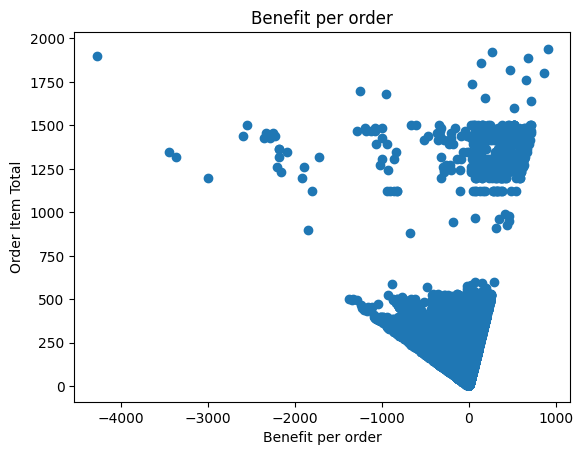

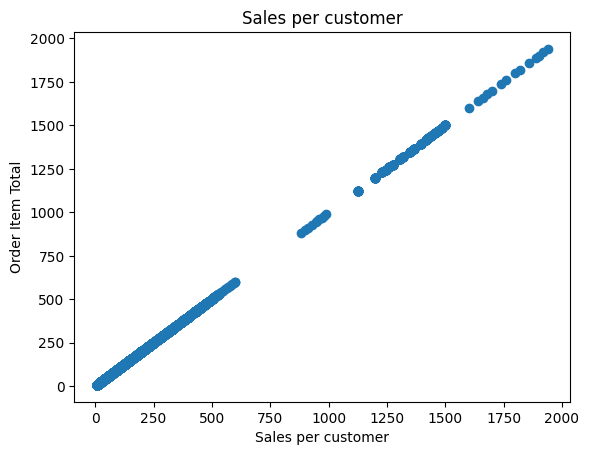

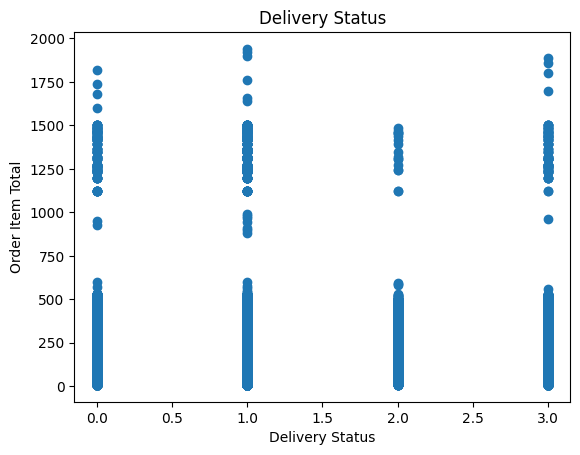

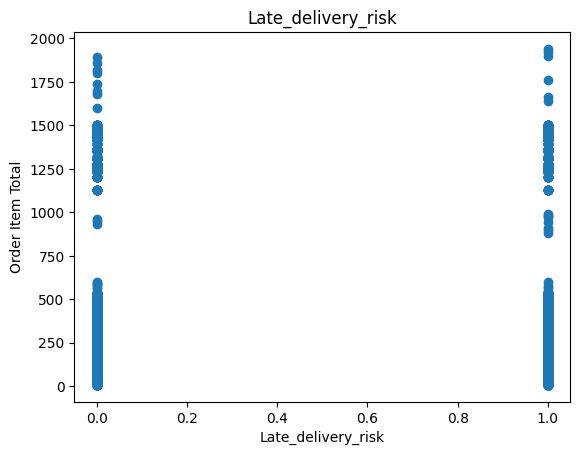

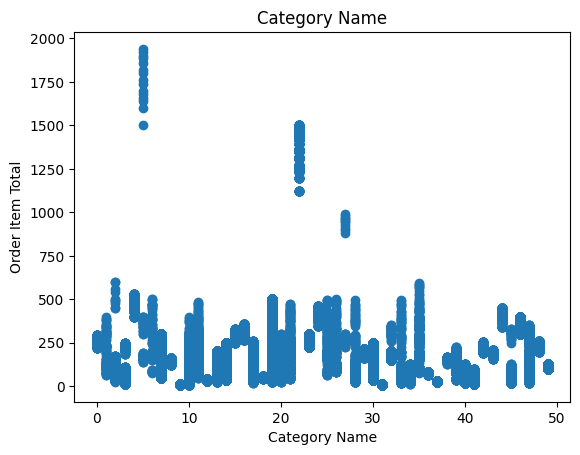

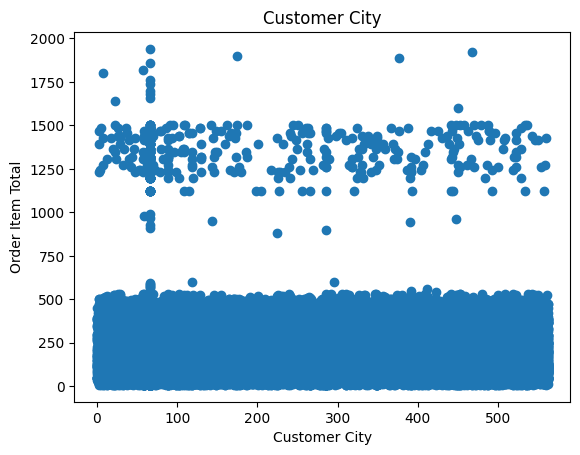

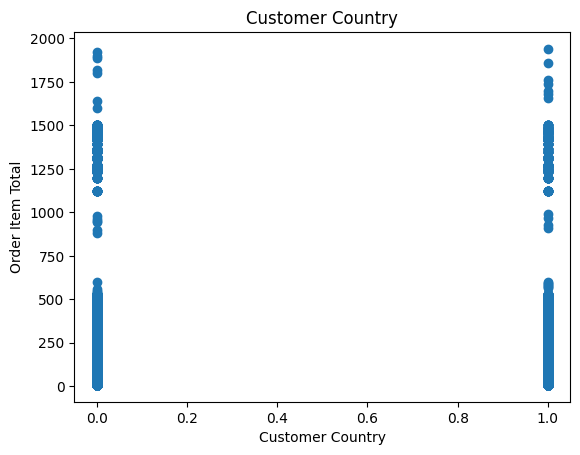

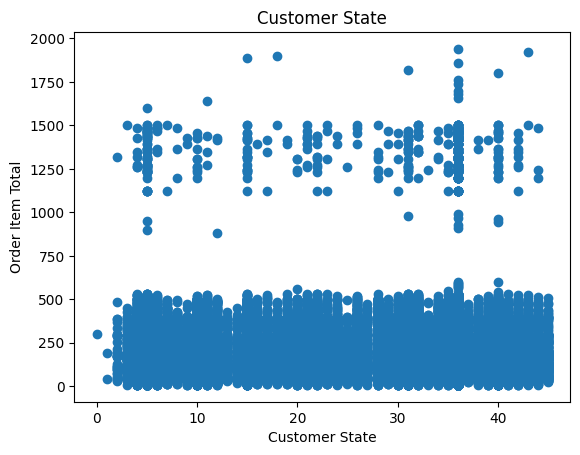

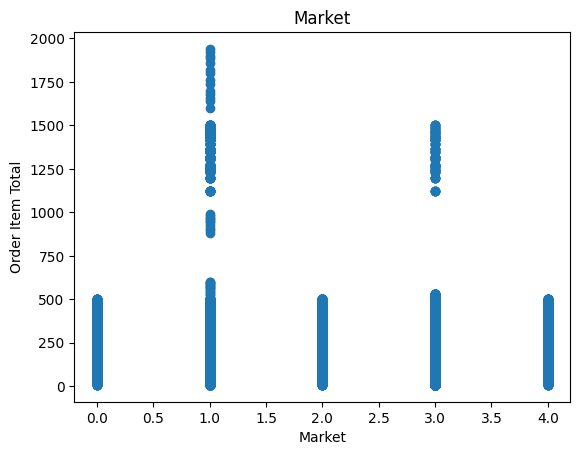

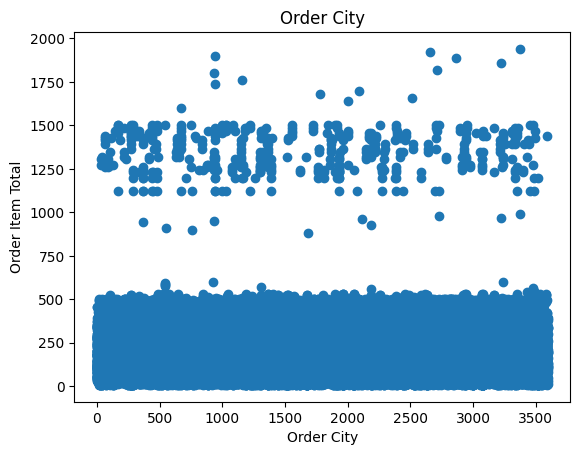

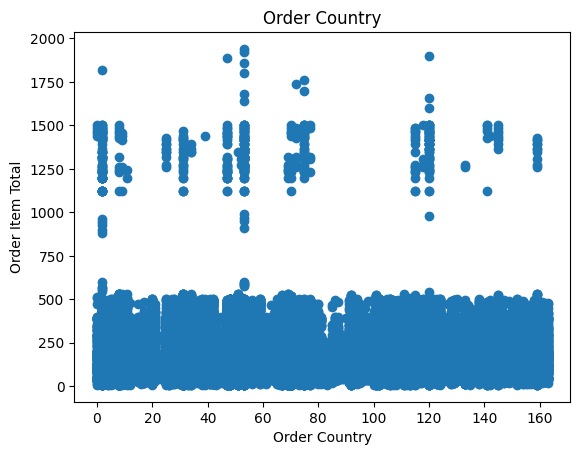

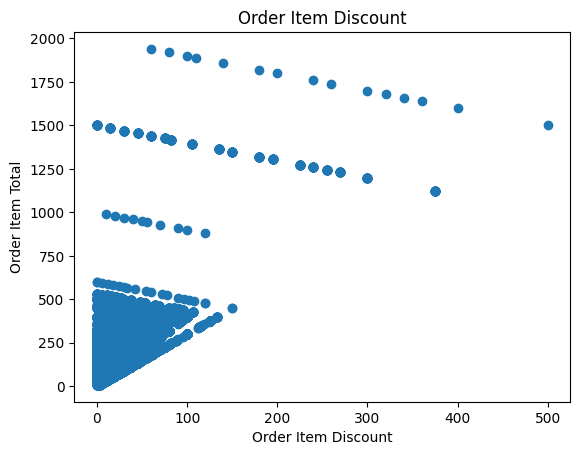

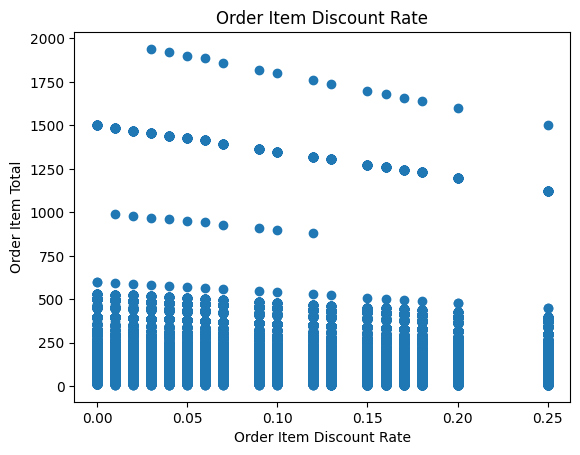

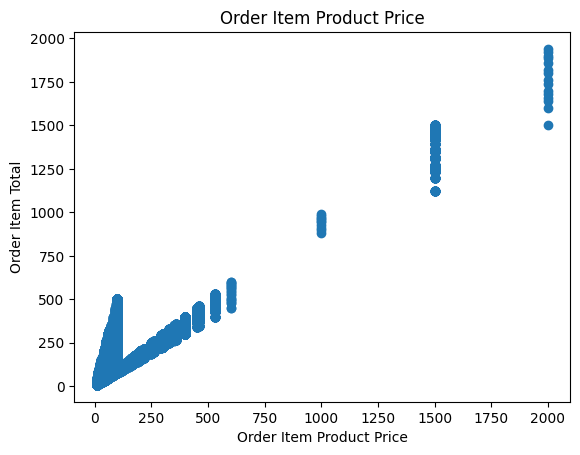

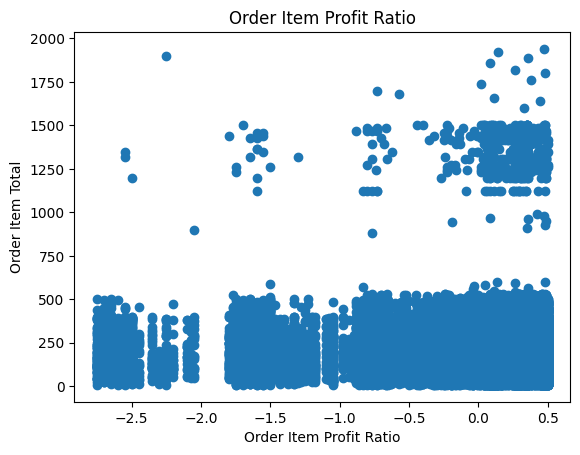

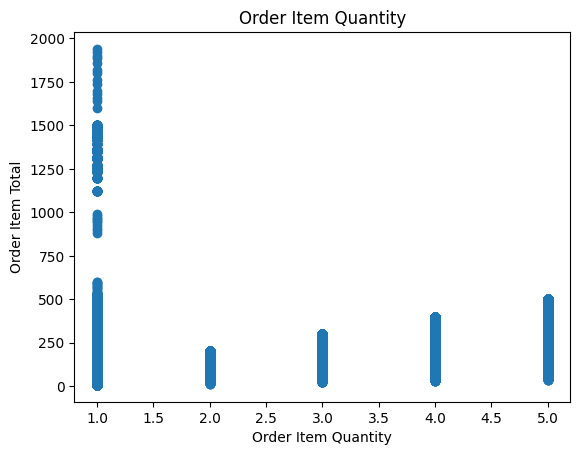

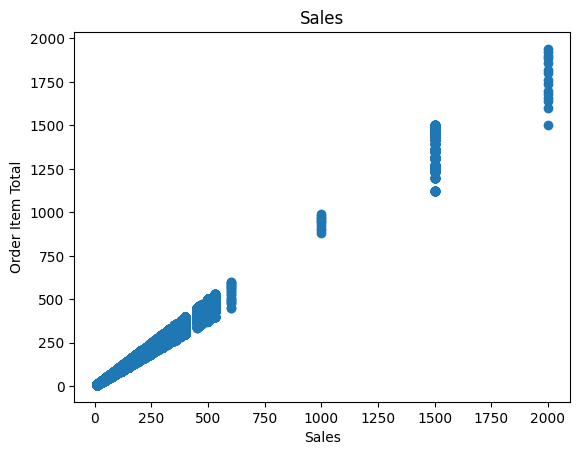

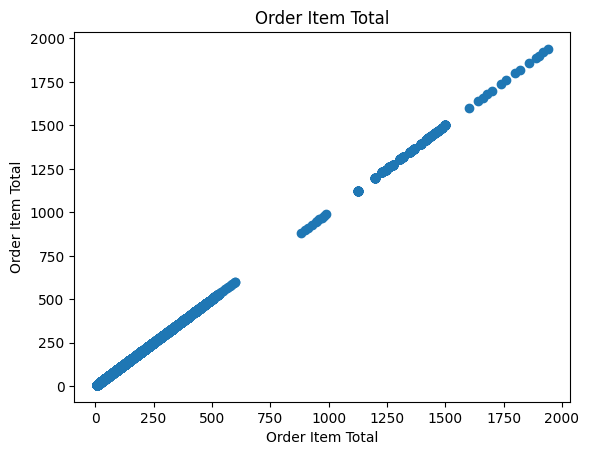

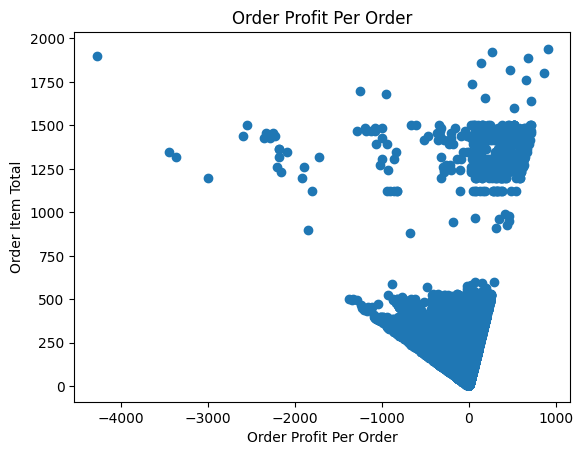

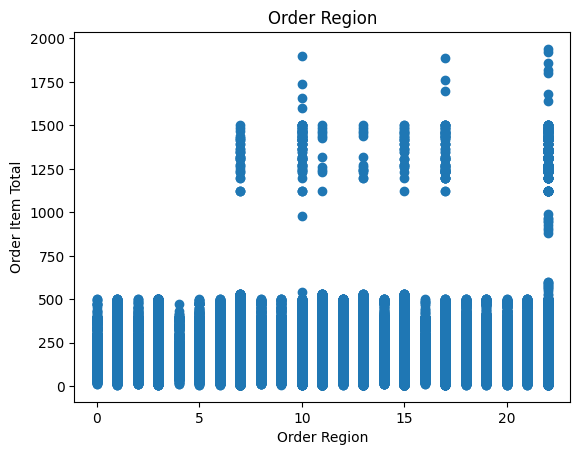

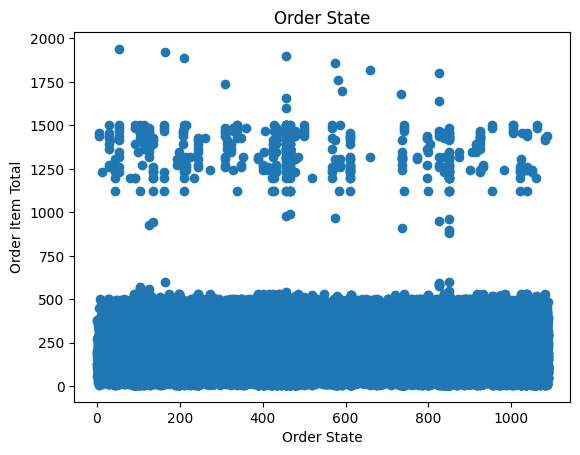

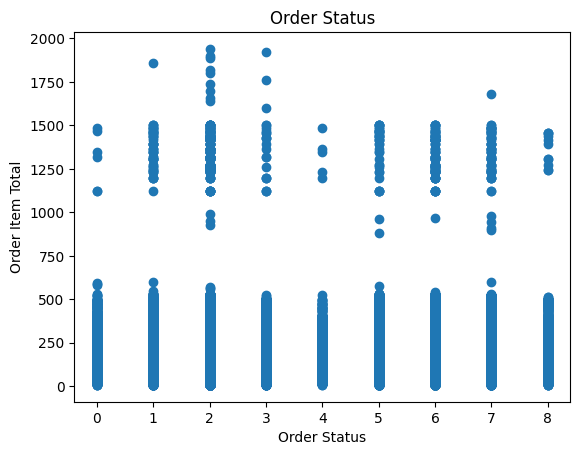

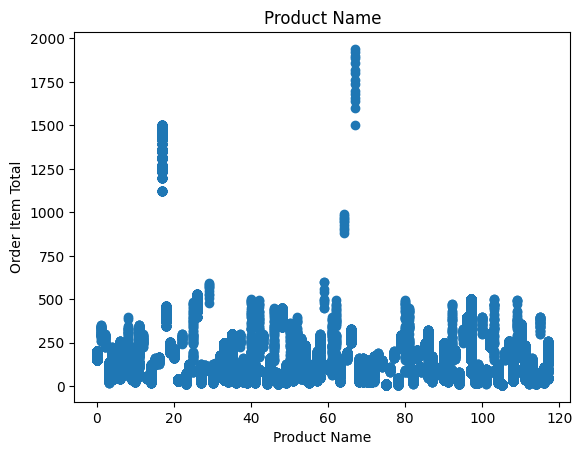

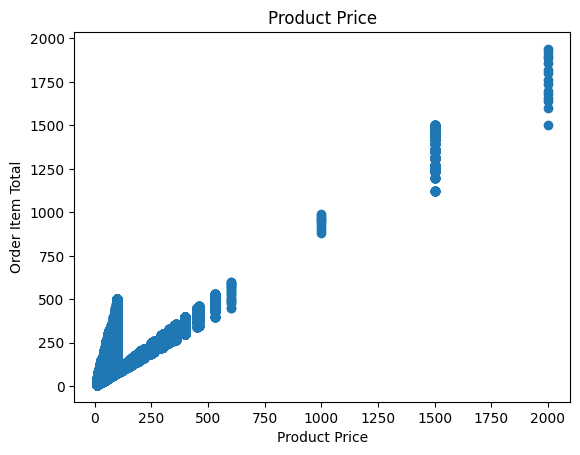

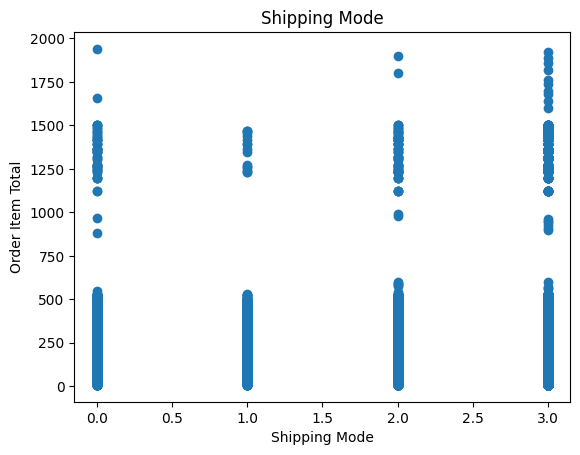

In [ ]:
for label in new_data.columns:
  plt.scatter(new_data[label],new_data["Order Item Total"])
  plt.title(label)
  plt.ylabel("Order Item Total")
  plt.xlabel(label)
  plt.show()